In [1]:
# Suppress warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import IsolationForest

# Load and show the dataset from the specified path
df = pd.read_csv("D:/cleaned_training_loan_data.csv", header=0)
df.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,annual_inc,percent_bc_gt_75,bc_util,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000001,11983056.0,7550,36,16.24,3.0,28000.0,100.0,96.0,8.40,...,0,0,0,0,0,0,0,0,0,0
1,10000002,12002921.0,27050,36,10.99,10.0,55000.0,25.0,53.9,22.87,...,0,0,0,0,0,0,0,0,0,0
2,10000003,11983096.0,12000,36,10.99,4.0,60000.0,0.0,15.9,4.62,...,0,0,0,0,0,0,0,0,0,0
3,10000004,12003142.0,28000,36,7.62,5.0,325000.0,16.7,67.1,18.55,...,0,0,0,0,0,0,0,0,0,0
4,10000005,11993233.0,12000,36,13.53,10.0,40000.0,33.3,79.6,16.94,...,0,0,0,0,0,0,0,0,0,0


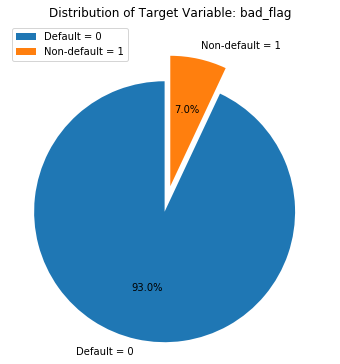

In [2]:
# Distribution of the Target Variable (bad_flag)
bad_flag_counts = df['bad_flag'].value_counts()
explode = (0.2, 0)  

plt.figure(figsize=(8, 6))
plt.pie(bad_flag_counts, labels=['Default = 0', 'Non-default = 1'],
        autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Target Variable: bad_flag')
plt.legend(labels=['Default = 0', 'Non-default = 1'], loc='upper left', frameon=True)
plt.show()

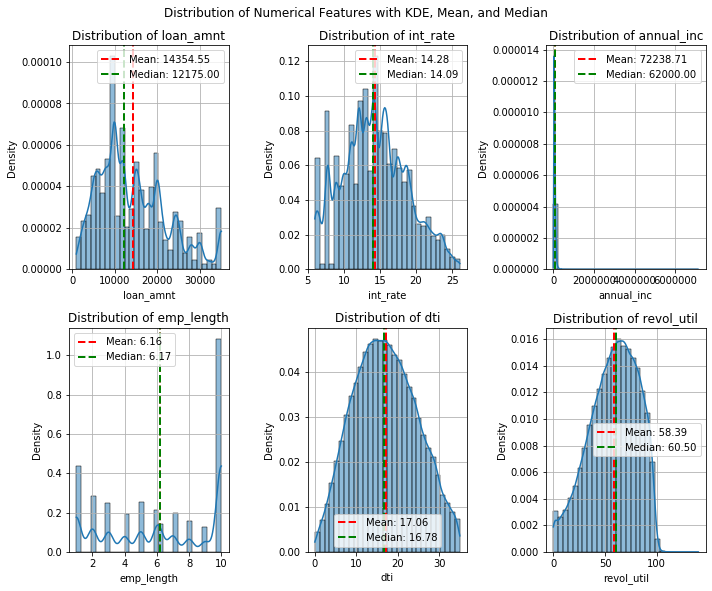

In [3]:
# Distribution of Numerical Features

# List of numerical features 
numerical_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'emp_length', 'dti', 'revol_util']

plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(df[column], kde=True, bins=30, stat='density')
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    # Add vertical lines for mean and median
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features with KDE, Mean, and Median', y=1.02)
plt.show()

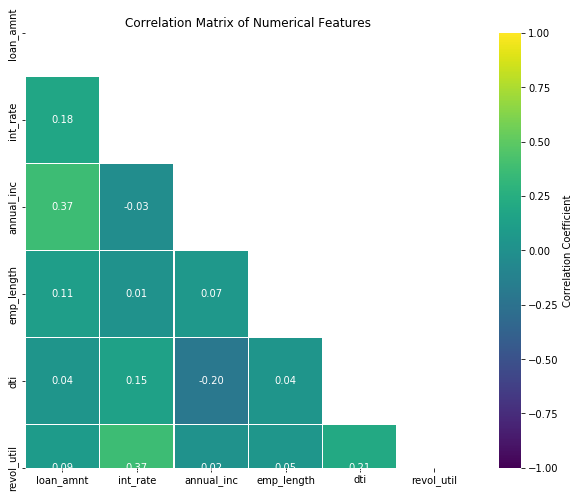

In [4]:
# heatmap for correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, mask=mask, 
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

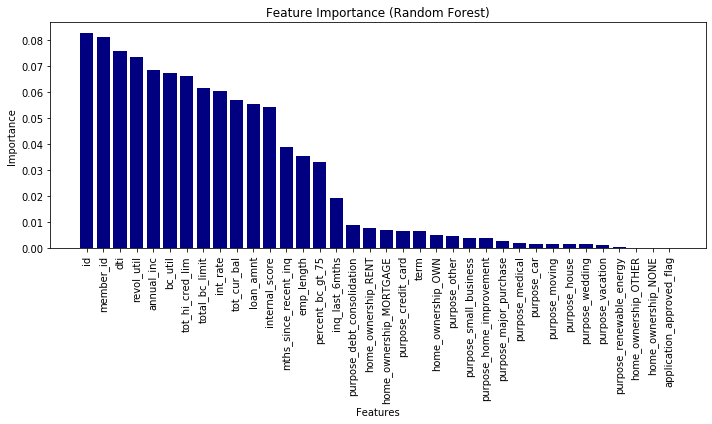

In [5]:
# Feature Importance Plot by Random Forest

X = df.drop(columns=['bad_flag'])
y = df['bad_flag']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

# Sort the features by importance (highest to lowest)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center', color='navy')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [6]:
# Display feature names and their importance scores in a table
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

feature_importance_df

,Feature,Importance
0,id,0.082636
1,member_id,0.081340
2,dti,0.075689
3,revol_util,0.073410
4,annual_inc,0.068555
5,bc_util,0.067344
6,tot_hi_cred_lim,0.066282
7,total_bc_limit,0.061520
8,int_rate,0.060471
9,tot_cur_bal,0.057116


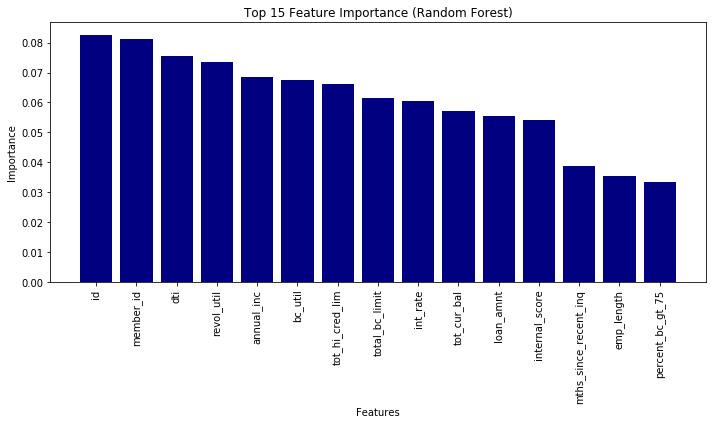

Top 15 Important Features:


['id',
 'member_id',
 'dti',
 'revol_util',
 'annual_inc',
 'bc_util',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'int_rate',
 'tot_cur_bal',
 'loan_amnt',
 'internal_score',
 'mths_since_recent_inq',
 'emp_length',
 'percent_bc_gt_75']

In [7]:
# Choosing top 15 features based on the importance 
top_15_indices = indices[:15]
top_15_features = X.columns[top_15_indices]

# Plot feature importances for the top 15 features
plt.figure(figsize=(10, 6))
plt.title('Top 15 Feature Importance (Random Forest)')
plt.bar(range(15), importances[top_15_indices], align='center', color='navy')
plt.xticks(range(15), top_15_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Display the list of top 15 features
print("Top 15 Important Features:")
list(top_15_features)

In [8]:
# selecting the top 15 features using Chi-squared Test 

X = df.drop(['bad_flag'], axis=1)
y = df['bad_flag']

X_encoded = X.copy()

# Use SelectKBest with chi2 test to select the top 15 features
selector = SelectKBest(chi2, k=15)
X_new = selector.fit_transform(X_encoded, y)
cols_idxs = selector.get_support(indices=True)

# Select columns based on indices and display the top 15 features
X_selected = X_encoded.iloc[:, cols_idxs]

# Display the top 15 selected features
print("Top 15 Selected Features:")
print(X_selected.columns.tolist())

# Show the first few rows of the new feature set
X_selected.head()

Top 15 Selected Features:
['id', 'member_id', 'loan_amnt', 'int_rate', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal', 'internal_score']


,id,member_id,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score
0,10000001,11983056.0,7550,16.24,28000.0,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,3828.953801,5759.0,99
1,10000002,12002921.0,27050,10.99,55000.0,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,34359.940730,114834.0,353
2,10000003,11983096.0,12000,10.99,60000.0,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,16416.617760,7137.0,157
3,10000004,12003142.0,28000,7.62,325000.0,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,38014.149760,799592.0,365
4,10000005,11993233.0,12000,13.53,40000.0,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,6471.462236,13605.0,157


In [9]:
# Cpmparision of the Chi-squared test & Random Forest
lstX2 = X_selected.columns.tolist()
lstRandFors = list(top_15_features)

# Convert lists to sets for easy comparison
setX2 = set(lstX2)
setRandFors = set(lstRandFors)

# Identify common elements (features present in both lists)
common_features = setX2.intersection(setRandFors)

# Identify unique elements (features only in lstX2 but not in lstRandFors)
unique_to_X2 = setX2.difference(setRandFors)

# Identify unique elements (features only in lstRandFors but not in lstX2)
unique_to_RandFors = setRandFors.difference(setX2)

# Print the results
print("Common Features:")
print(common_features)

print("\nFeatures Unique to X_selected:")
print(unique_to_X2)

print("\nFeatures Unique to Top 15 Features (Random Forest):")
print(unique_to_RandFors)

# Optional: Count the number of common and unique features
print(f"\nNumber of common features: {len(common_features)}")
print(f"Number of features unique to X_selected: {len(unique_to_X2)}")
print(f"Number of features unique to Top 15 Features: {len(unique_to_RandFors)}")

Common Features:
{'bc_util', 'internal_score', 'annual_inc', 'tot_hi_cred_lim', 'dti', 'revol_util', 'tot_cur_bal', 'mths_since_recent_inq', 'int_rate', 'id', 'total_bc_limit', 'percent_bc_gt_75', 'loan_amnt', 'member_id'}

Features Unique to X_selected:
{'inq_last_6mths'}

Features Unique to Top 15 Features (Random Forest):
{'emp_length'}

Number of common features: 14
Number of features unique to X_selected: 1
Number of features unique to Top 15 Features: 1


In [10]:
# Modify the df to keep only the top 15 features based on Chi-squared Test
df = pd.concat([X_selected, y], axis=1)

print("\nModified DataFrame (Top 15 Features and Target 'bad_flag'):")
df.head()


Modified DataFrame (Top 15 Features and Target 'bad_flag'):


,id,member_id,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag
0,10000001,11983056.0,7550,16.24,28000.0,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,3828.953801,5759.0,99,0.0
1,10000002,12002921.0,27050,10.99,55000.0,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,34359.940730,114834.0,353,0.0
2,10000003,11983096.0,12000,10.99,60000.0,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,16416.617760,7137.0,157,0.0
3,10000004,12003142.0,28000,7.62,325000.0,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,38014.149760,799592.0,365,0.0
4,10000005,11993233.0,12000,13.53,40000.0,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,6471.462236,13605.0,157,0.0


In [11]:
# Save the DataFrame to a CSV file, excluding the index column
file_path = 'D:/processed_training_loan_data.csv'
df.to_csv(file_path, index=False) 

 1    186241
-1      1882
Name: anomaly, dtype: int64


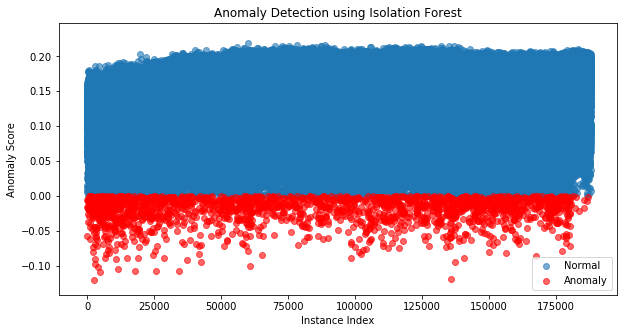

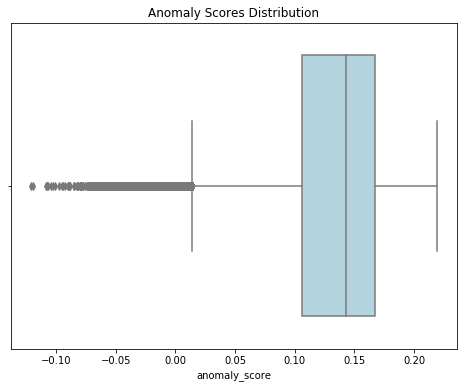

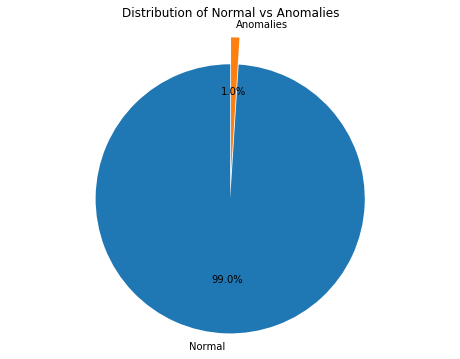

In [11]:
# anomaly detection using the Isolation Forest 

n_estimators = 100  # Number of trees in the forest
contamination = 0.01  # Expected proportion of outliers
sample_size = 256  # Number of samples to train each tree

features = df.select_dtypes(include=[np.number])  
iso_forest = IsolationForest(n_estimators=n_estimators,
                            contamination=contamination,
                            max_samples=sample_size,
                            random_state=123)
iso_forest.fit(features)

# Calculate anomaly scores and classify anomalies
df['anomaly_score'] = iso_forest.decision_function(features)  # Calculate anomaly score
df['anomaly'] = iso_forest.predict(features)  # Predict anomalies (1 for normal, -1 for anomaly)

# Check how many anomalies and normal instances
print(df['anomaly'].value_counts())

# Visualization of the results
plt.figure(figsize=(10, 5))

normal = df[df['anomaly'] == 1]  
plt.scatter(normal.index, normal['anomaly_score'], label='Normal', alpha=0.6)

anomalies = df[df['anomaly'] == -1]  
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly', color='red', alpha=0.6)

plt.xlabel("Instance Index")
plt.ylabel("Anomaly Score")
plt.title("Anomaly Detection using Isolation Forest")
plt.legend()
plt.show()

# Box plot to better visualize the distribution of anomaly scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['anomaly_score'], color='lightblue')
plt.title('Anomaly Scores Distribution')
plt.show()

# Pie chart for the distribution of normal vs anomalies
labels = ['Normal', 'Anomalies']
sizes = [df[df['anomaly'] == 1].shape[0], df[df['anomaly'] == -1].shape[0]]  # Count normal vs anomalies

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.2, 0))
plt.title('Distribution of Normal vs Anomalies')
plt.axis('equal')
plt.show()


The anomalies appear to be valid and may represent significant rare events, such as fraud or exceptional cases of loan defaults, and should therefore be retained

In [12]:
df.head()

,id,member_id,loan_amnt,int_rate,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,tot_hi_cred_lim,tot_cur_bal,internal_score,bad_flag,anomaly_score,anomaly
0,10000001,11983056.0,7550,16.24,28000.0,100.0,96.0,8.40,0.0,17.0,72.0,4000.0,3828.953801,5759.0,99,0.0,0.105777,1
1,10000002,12002921.0,27050,10.99,55000.0,25.0,53.9,22.87,0.0,8.0,61.2,35700.0,34359.940730,114834.0,353,0.0,0.107448,1
2,10000003,11983096.0,12000,10.99,60000.0,0.0,15.9,4.62,1.0,3.0,24.0,18100.0,16416.617760,7137.0,157,0.0,0.117730,1
3,10000004,12003142.0,28000,7.62,325000.0,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,38014.149760,799592.0,365,0.0,-0.006403,-1
4,10000005,11993233.0,12000,13.53,40000.0,33.3,79.6,16.94,0.0,17.0,68.8,7000.0,6471.462236,13605.0,157,0.0,0.135942,1


In [17]:
from collections import Counter

anomalies = df[df['anomaly'] == -1]
dict(Counter(anomalies['bad_flag']))

{0.0: 1306, 1.0: 576}

In [14]:
# Save the DataFrame to a CSV file, excluding the index column
file_path = 'D:/processed_anomaly_training_loan_data.csv'
df.to_csv(file_path, index=False) 